In [3]:
#high level summary
#clean up boxplot.
#two additional queries -- what should i pull?
     #precip
     #station discrepancies?  what stations were omitted in the original analysis

In [3]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [43]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [45]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps_query = session.query(Measurement.date, Measurement.tobs)\
                          .filter(extract("month", Measurement.date) == 6)\
                          .all()

In [46]:
#  3. Convert the June temperatures to a list.
june_temps_list = []
for record in june_temps_query:
    june_temps_list.append(record)

In [51]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(data=june_temps_list, columns=["date", "temp"])

In [61]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_stats_df = june_temps_df.describe()
june_stats_df

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [55]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps_query = session.query(Measurement.date, Measurement.tobs)\
                         .filter(extract("month", Measurement.date) == 12)\
                         .all()

In [56]:
# 7. Convert the December temperatures to a list.
dec_temps_list = []
for record in dec_temps_query:
    dec_temps_list.append(record)

In [57]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(data=dec_temps_list, columns=["date", "temp"])

In [62]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_stats_df = dec_temps_df.describe()
dec_stats_df

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Observations
* 10.8% fewer observations were recorded in June.  This warrants further analysis to identify\
investigate potential impact on measurement.
* December standard deviation is 15% higher than June standard deviation.
* Most of the standard deviation comes the low end on the temperature scale.  Will create\
chart to observe.  More outliers in December.

In [76]:
temp_comparison_df = pd.merge(left=june_stats_df,
                               right=dec_stats_df,
                               how='inner',
                               left_index=True,
                               right_index=True,
                               suffixes=['_june','_dec'])
temp_comparison_df['diff_abs'] = temp_comparison_df['temp_june'] - temp_comparison_df['temp_dec']
temp_comparison_df['diff_pct'] = 100 * temp_comparison_df['diff_abs']/temp_comparison_df['temp_june']

temp_comparison_df

,temp_june,temp_dec,diff_abs,diff_pct
count,1700.000000,1517.000000,183.000000,10.764706
mean,74.944118,71.041529,3.902588,5.207331
std,3.257417,3.745920,-0.488503,-14.996630
min,64.000000,56.000000,8.000000,12.500000
25%,73.000000,69.000000,4.000000,5.479452
50%,75.000000,71.000000,4.000000,5.333333
75%,77.000000,74.000000,3.000000,3.896104
max,85.000000,83.000000,2.000000,2.352941


<AxesSubplot:>

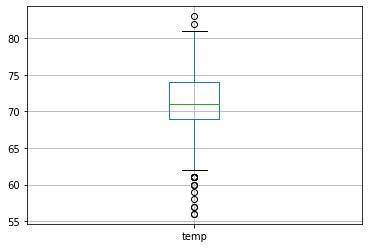

In [78]:
# significant low outliers
dec_temps_df.boxplot()

<AxesSubplot:>

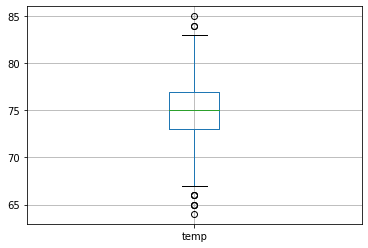

In [79]:
june_temps_df.boxplot()

<AxesSubplot:>

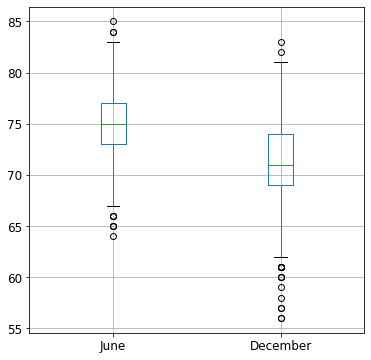

In [92]:
combined_temps_df = pd.DataFrame({'June':june_temps_df['temp'], 'December':dec_temps_df['temp']})
combined_temps_df.boxplot(figsize=(6,6), fontsize='large')